In [18]:
#Importing Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
# Load dataset
df = pd.read_csv("/content/Housing.csv")



In [7]:
# Check column names to avoid KeyError
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [11]:
# 2. Select features & target
if 'area' in df.columns and 'price' in df.columns:
    X = df[['area']]  # simple regression with one feature
    y = df['price']
else:
    raise ValueError("Required columns not found in dataset. Check df.columns output above.")

In [12]:
# 3. Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [13]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# 5. Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# 6. Predictions
y_pred = model.predict(X_test)


In [16]:
# 7. Evaluation
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

MAE: 1474748.13
MSE: 3675286604768.19
RMSE: 1917103.70
R²: 0.27


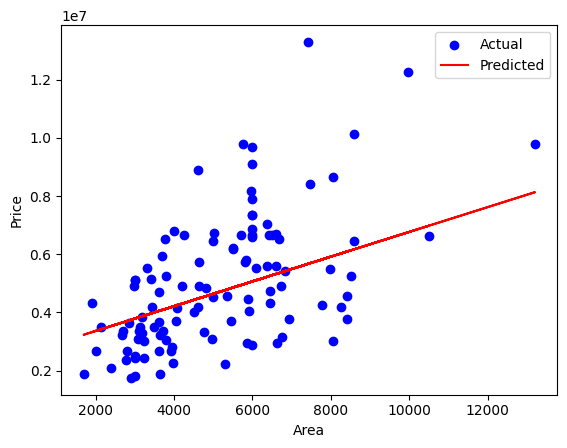

In [17]:
# 8. Plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()